In [10]:
# Code to unzip a TAR file on Windows or Mac. NOTE: Run only once to unzip
# import tarfile 
# file = tarfile.open('VIAJES/202406_Viajes_distritos.tar') # open file, a zipped folder containing all data monthly (typically in .tar format)
# file.extractall('VIAJES/basicos_distritos_viajes_202406') # extracting file, unzipped folder containing several files
# file.close() 

In [63]:
import config as cfg
import os
import pandas as pd
from utils import get_overview, open_gz, filter_district

In [64]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [65]:
# get_overview(viajes)

In [66]:
# FIXME: Read more about DtypeWarning and fix
viajes_1_2_3 = open_gz(viajes_dir / 'basicos_distritos_viajes_202406', [0,1,2]) # substracting all trips in all districts of Spain during day 1st, 2nd and 3rd of June

/Users/caro/Desktop/thesis_project/mobility_data/utils.py:33: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|') # Read the compressed CSV file
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:33: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|') # Read the compressed CSV file
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:33: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|') # Read the compressed CSV file


In [18]:
viajes_1 = viajes_1_2_3[0] # accessing the first stored day (June 1st)

In [19]:
viajes_1.shape

(20207303, 15)

In [20]:
viajes_1.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20240601,10,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.300,35.172
1,20240601,11,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.300,39.108
2,20240601,14,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.531,51.761
3,20240601,21,01017_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.192,53.032
4,20240601,8,01047_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.350,104.429


In [21]:
viajes_1.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
20207298,20240601,13,0801907,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,>15,45-65,mujer,3.053,2484.267
20207299,20240601,8,2906711,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,10-15,45-65,NaN,3.287,684.447
20207300,20240601,12,2906709,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,>15,65-100,NaN,1.742,361.148
20207301,20240601,17,20067,FRI15,10-50,no_frecuente,trabajo_estudio,no,no,20,10-15,0-25,hombre,3.242,32.595
20207302,20240601,11,2004504,FRI15,2-10,no_frecuente,trabajo_estudio,no,no,31,10-15,NaN,NaN,5.026,26.125


In [22]:
madrid_1 = filter_district(viajes_1, '28079')
len(madrid_1)

359879

In [23]:
madrid_1.describe()

,fecha,periodo,residencia,viajes,viajes_km
count,359879.0,359879.000000,359879.000000,359879.000000,359879.000000
mean,20240601.0,13.369241,27.755807,7.898976,22.358912
std,0.0,6.181548,6.032296,17.105964,28.635283
min,20240601.0,0.000000,1.000000,1.000000,0.509000
25%,20240601.0,9.000000,28.000000,2.959000,6.613000
50%,20240601.0,14.000000,28.000000,4.093000,14.103000
75%,20240601.0,18.000000,28.000000,6.963000,28.019000
max,20240601.0,23.000000,52.000000,627.112000,728.275000


In [32]:
# IMPORTANT: when filtering only those who travel from home, the residence is only the province of Madrid
madrid_1[madrid_1['actividad_origen']=='casa'].residencia.value_counts()

residencia
28    55769
Name: count, dtype: int64

In [67]:
madrid_1[madrid_1['actividad_destino']=='casa'].residencia.value_counts()

residencia
28    46951
Name: count, dtype: int64

In [68]:
#NOTE: The residence of the users in the MITMA data is not by district, but by province. 
# This could be a problem as I am trying to understand how people from different districts move. 
# As a solution, I could filter to only use ‘origen’ == casa or ‘destino’==casa in the districts of Madrid. 
# This way, I could make sure that I am taking a look at those records of people who actually live in a specific district in Madrid.
# The problem is that the mobility would be very limited to those trips either coming from or going home.
filtered_df = madrid_1.loc[(madrid_1['actividad_origen'] == 'casa') | (madrid_1['actividad_destino'] == 'casa')]

In [69]:
filtered_df

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
1294585,20240601,0,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,161.274,135.862
1294586,20240601,0,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,143.875,134.446
1294587,20240601,1,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,71.225,51.225
1294588,20240601,1,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,73.534,65.380
1294589,20240601,2,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,38.566,41.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18831321,20240601,18,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,65-100,mujer,7.721,25.535
18831322,20240601,18,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,65-100,hombre,1.844,4.399
18831323,20240601,20,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,65-100,hombre,3.688,8.230
18831324,20240601,21,2807921,2807921,2-10,casa,trabajo_estudio,no,no,28,>15,65-100,mujer,3.015,9.648


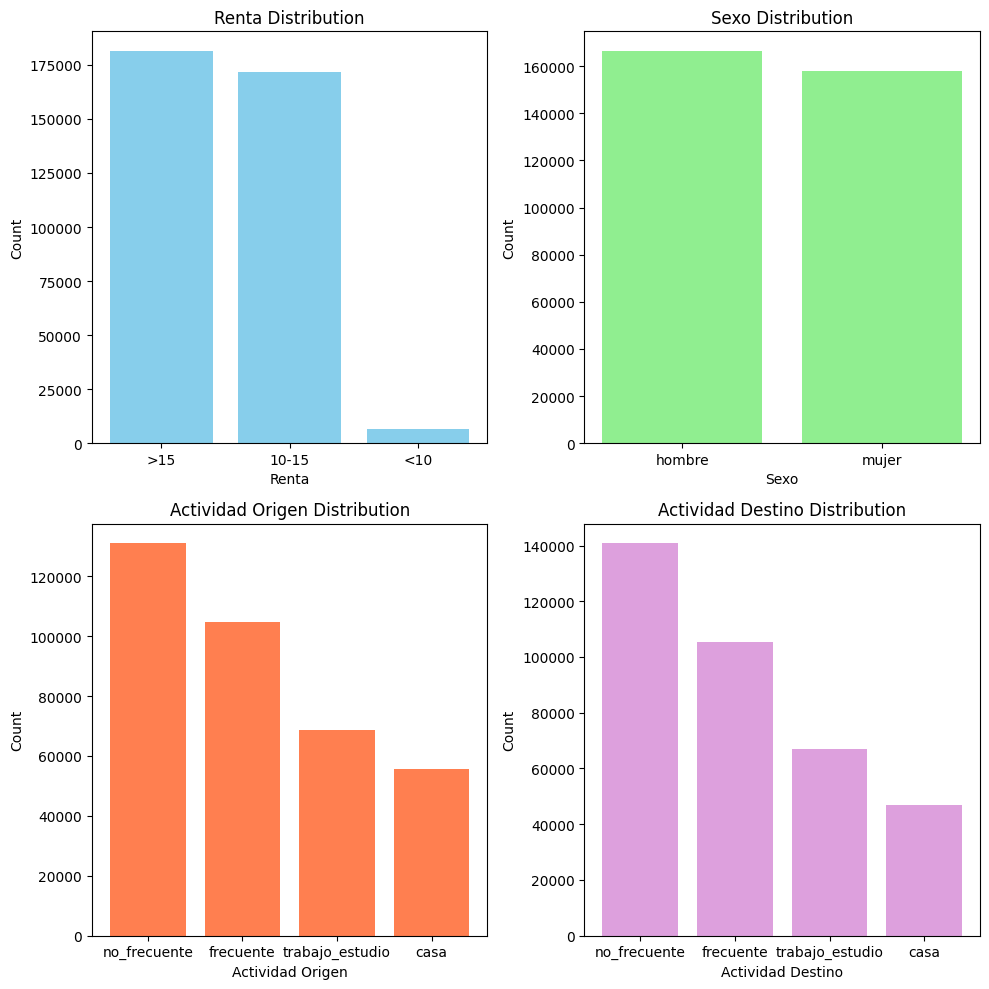

In [20]:
import matplotlib.pyplot as plt
# Get distribution of renta
renta_distribution = madrid_1['renta'].value_counts()

# Get distribution of sexo
sexo_distribution = madrid_1['sexo'].value_counts()

# Get distribution of actividad_origen and actividad_destino
actividad_origen_distribution = madrid_1['actividad_origen'].value_counts()
actividad_destino_distribution = madrid_1['actividad_destino'].value_counts()

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Renta distribution
axes[0, 0].bar(renta_distribution.index, renta_distribution.values, color='skyblue')
axes[0, 0].set_title('Renta Distribution')
axes[0, 0].set_xlabel('Renta')
axes[0, 0].set_ylabel('Count')

# Sexo distribution
axes[0, 1].bar(sexo_distribution.index, sexo_distribution.values, color='lightgreen')
axes[0, 1].set_title('Sexo Distribution')
axes[0, 1].set_xlabel('Sexo')
axes[0, 1].set_ylabel('Count')

# Actividad Origen distribution
axes[1, 0].bar(actividad_origen_distribution.index, actividad_origen_distribution.values, color='coral')
axes[1, 0].set_title('Actividad Origen Distribution')
axes[1, 0].set_xlabel('Actividad Origen')
axes[1, 0].set_ylabel('Count')

# Actividad Destino distribution
axes[1, 1].bar(actividad_destino_distribution.index, actividad_destino_distribution.values, color='plum')
axes[1, 1].set_title('Actividad Destino Distribution')
axes[1, 1].set_xlabel('Actividad Destino')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

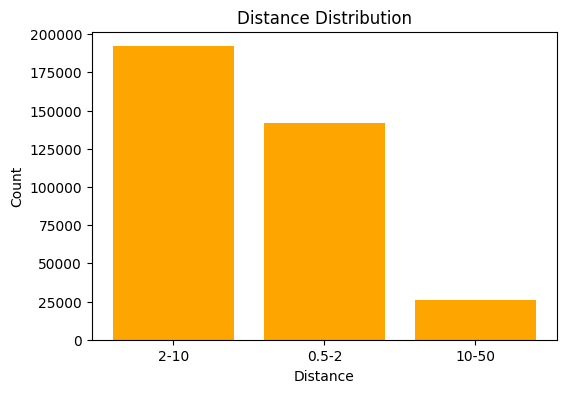

In [21]:
distancia_distribution = madrid_1['distancia'].value_counts()

# Plot distance distribution
plt.figure(figsize=(6, 4))
plt.bar(distancia_distribution.index, distancia_distribution.values, color='orange')
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

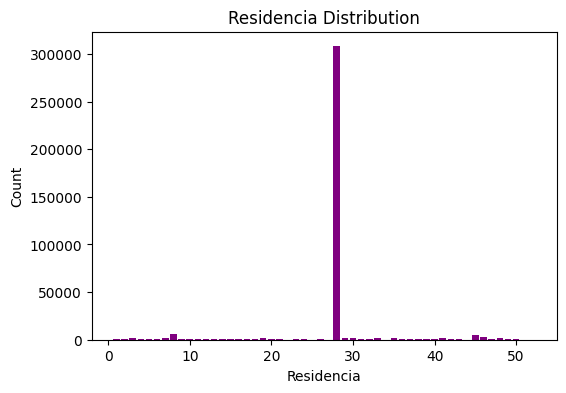

In [22]:
# Get distribution of residencia
residencia_distribution = madrid_1['residencia'].value_counts()

# Plot residencia distribution
plt.figure(figsize=(6, 4))
plt.bar(residencia_distribution.index, residencia_distribution.values, color='purple')
plt.title('Residencia Distribution')
plt.xlabel('Residencia')
plt.ylabel('Count')
plt.show()
